## EDA(Exploratory Data Analysis) Part

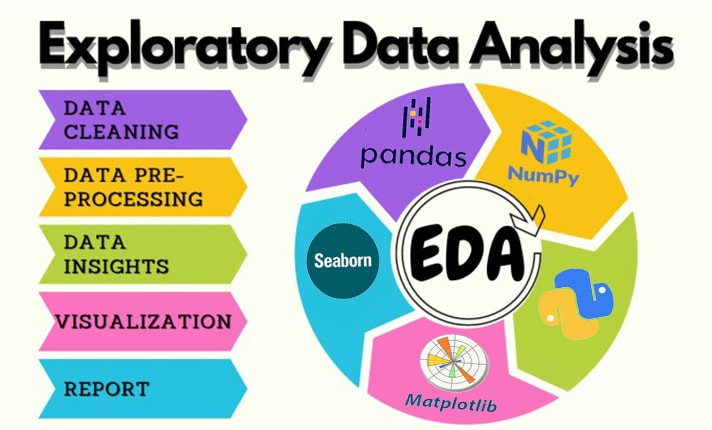

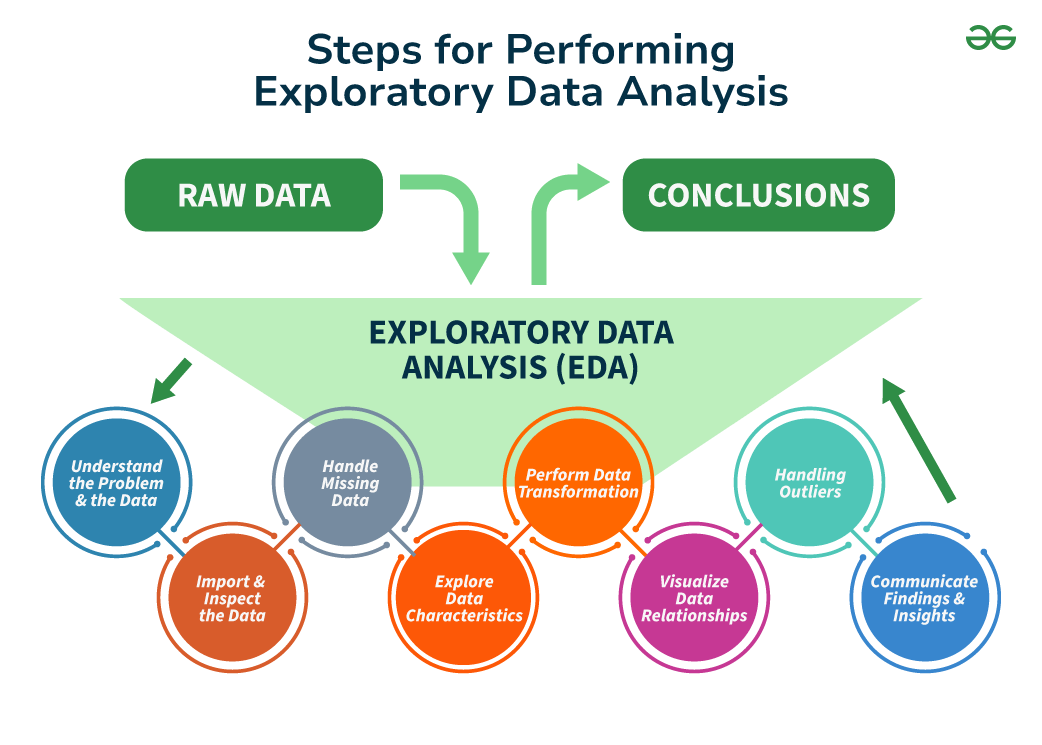

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  # Hide all warnings

In [381]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Diabetes Prediction/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


###  **Feature Descriptions:**

| Feature                      | Meaning                          | Higher Value Suggests                                  | Lower Value Suggests                       |
| ---------------------------- | -------------------------------- | ------------------------------------------------------ | ------------------------------------------ |
| **Pregnancies**              | Number of times pregnant         | Possible increased diabetes risk                       | Lower risk                                 |
| **Glucose**                  | Blood glucose level              | Strong indicator of diabetes if high                   | Low risk                                   |
| **BloodPressure**            | Diastolic blood pressure (mm Hg) | Very high/low can be risky                             | Normal range is 60–80                      |
| **SkinThickness**            | Skin fold thickness (mm)         | Reflects body fat; high may suggest insulin resistance | Zero may indicate missing or invalid value |
| **Insulin**                  | Insulin level in the blood       | High may suggest insulin resistance                    | Zero often means not measured              |
| **BMI**                      | Body Mass Index                  | High BMI (≥30) = overweight/obese                      | Normal: 18.5–24.9                          |
| **DiabetesPedigreeFunction** | Family history score             | High score = strong family risk                        | Low score = less genetic risk              |
| **Age**                      | Age in years                     | Older age = higher risk                                | Younger = lower risk                       |
| **Outcome**                  | 1 = Diabetic, 0 = Non-diabetic   | Indicates presence of diabetes                         | Indicates absence of diabetes              |

---

###  **Interpretation of the First 3 Records:**

| Row   | Analysis                                                                                                                                      |
| ----- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **1** | A 50-year-old woman with 6 pregnancies, very high glucose (148), BMI 33.6 (overweight), insulin not measured. **Outcome = 1** → Has diabetes. |
| **2** | 31 years old, glucose 85 (normal), BMI 26.6 (slightly overweight). **Outcome = 0** → No diabetes.                                             |
| **3** | 32 years old, glucose 183 (**very high**), skin thickness = 0 (possibly missing), BMI 23.3 (normal). **Outcome = 1** → Has diabetes.          |

In [382]:
# See full Dataset
# print(df.to_string())

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [384]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There are no null values ​​in this data set. But Some cell has value 0.

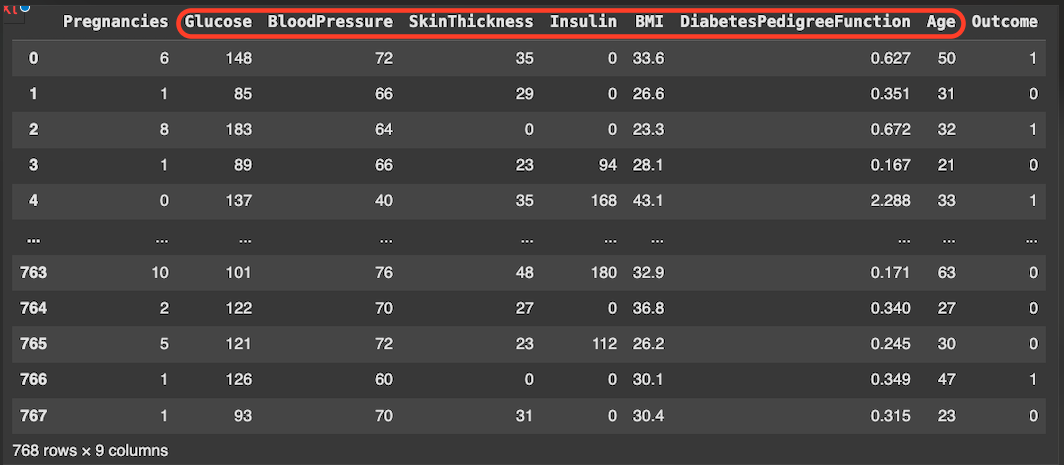

In [385]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [386]:
df['Outcome'].value_counts() # Target Column

,count
Outcome,
0,500
1,268


The number of non-diabetic is 268 and the number of diabetic patients is 500. The Numbers shows that the data is unbalanced.

In [387]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

**Why you're doing this:**
Replacing biologically invalid `0` values with `NaN` in medical columns where **0 doesn't make sense** (e.g., 0 BMI or 0 glucose is unrealistic), so that they can be properly **handled as missing values** during preprocessing.


In [388]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [389]:
missing_values = df.isna().sum()
missing_values

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


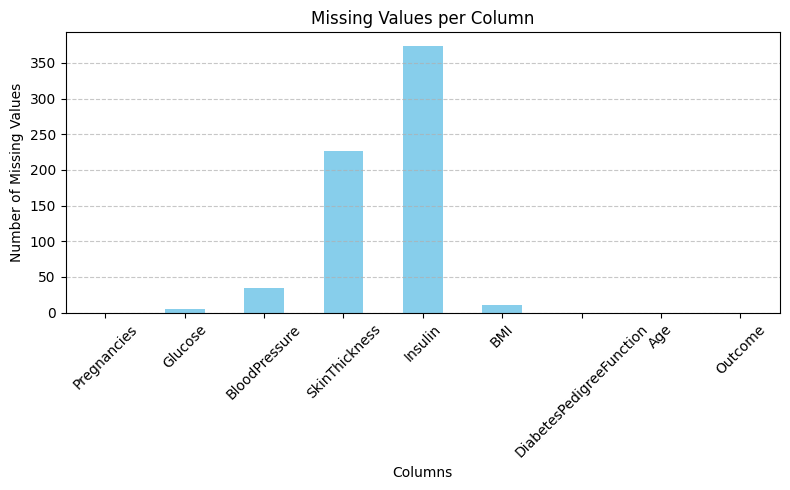

In [390]:
plt.figure(figsize=(8, 5))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The plot shows that Insulin and SkinThickness have the highest number of missing values, indicating they may need special attention during imputation or modeling.

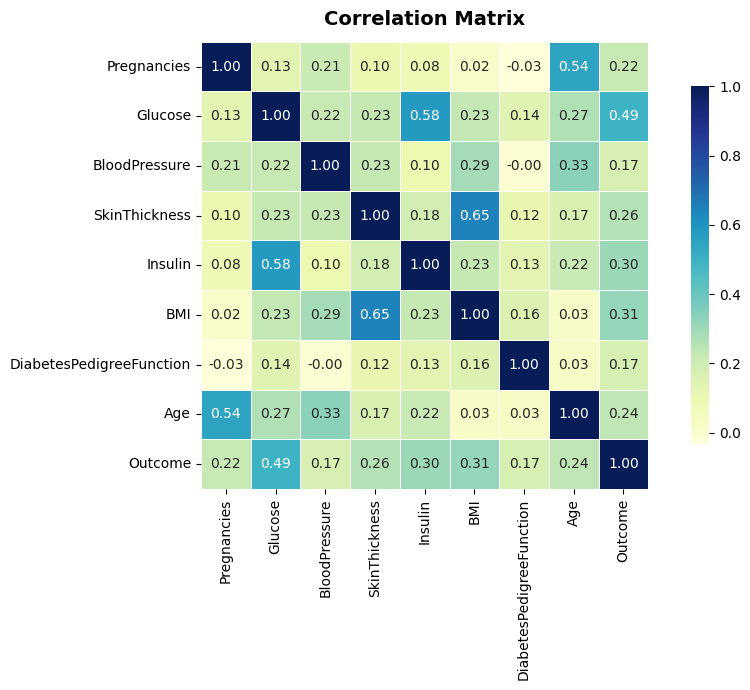

Values close to +1 indicate a strong positive correlation (as one increases, the other tends to increase).
Values close to -1 indicate a strong negative correlation (as one increases, the other tends to decrease).
Values close to 0 indicate a weak or no linear correlation.


In [391]:
# Calculate correlation matrix
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 7))

# Create heatmap with styling
sns.heatmap(
    corr,
    annot=True,             # show correlation values
    fmt=".2f",              # format: 2 decimal
    cmap="YlGnBu",          # Yellow-Green-Blue color map (nice gradient)
    linewidths=0.5,         # thin lines between boxes
    linecolor='white',
    square=True,            # square-shaped cells
    cbar_kws={"shrink": .8} # shrink colorbar
)

# Add title
plt.title("Correlation Matrix", fontsize=14, fontweight='bold', pad=12)

# Show plot
plt.tight_layout()
plt.show()


print("Values close to +1 indicate a strong positive correlation (as one increases, the other tends to increase).")
print("Values close to -1 indicate a strong negative correlation (as one increases, the other tends to decrease).")
print("Values close to 0 indicate a weak or no linear correlation.")

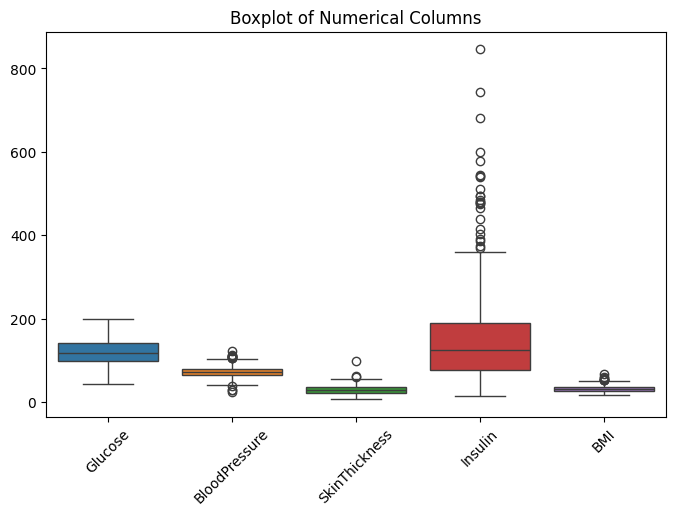

In [392]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

| Column            | Understanding                               | Imputation Technique              | Reason                                                                 |
| :---------------- | :------------------------------------------ | :-------------------------------- | :--------------------------------------------------------------------- |
| **Glucose** | Symmetric, no major outliers                | **Mean** imputation             | Distribution balanced, no extreme values                               |
| **BloodPressure** | Some **outliers** on the lower side (low)   | **Median** imputation           | Mean imputation could be skewed due to outliers                        |
| **SkinThickness** | Some outliers on the upper side             | **Median** imputation           | Slightly skewed, so safer                                              |
| **Insulin** | **Heavy outliers** (up to 800+)             | **Median** or **KNN Imputation**  | Using mean would distort the data due to high outliers                 |
| **BMI** | Some moderate outliers                      | **Median** imputation           | Slightly skewed, safer than mean                                       |

In [393]:
cols = ['Glucose', 'Insulin', 'BMI', 'BloodPressure', 'SkinThickness']
for col in cols:
    df[col].fillna(df[col].mean(), inplace=True)


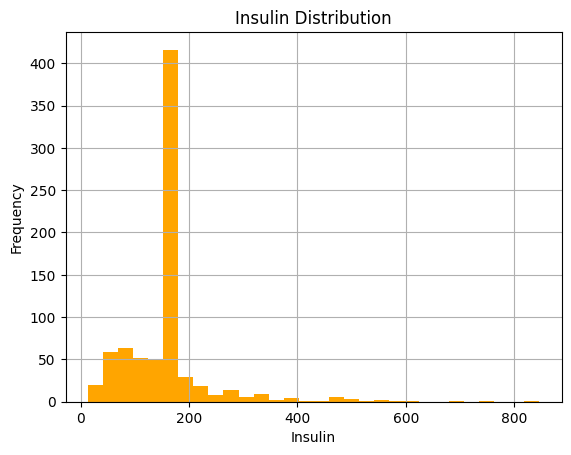

In [394]:
df['Insulin'].hist(bins=30, color='orange')
plt.title('Insulin Distribution')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

In [395]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


Insulin's medians by the target are really different ! 102.5 for a healthy person and 169.5 for a diabetic person

In [396]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [397]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Encoading

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


No need to Encoding, because there is no String or Text column

## Train Test Split

In [399]:
X = df.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [400]:
y = df['Outcome']
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [401]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**`stratify=y` ensures the train-test split maintains the same class ratio as the original data.**  

For example, if your dataset has 80% negatives (`0`) and 20% positives (`1`), both train and test sets will preserve this 80-20 distribution.  

**Critical for imbalanced datasets!**

In [402]:
print(f"Shapes - X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Shapes - X_train: (614, 8), X_test: (154, 8), y_train: (614,), y_test: (154,)


## Scaling

In [403]:
from sklearn.preprocessing import StandardScaler

# Step 3: Scaling (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [404]:
X_train_scaled

array([[-0.85135507, -1.0575301 , -0.82797293, ..., -0.76981811,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.14339202,  0.47653222, ..., -0.41783762,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.55714588, -1.15409922, ...,  0.35945263,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.82401747, -0.17572035, ...,  0.82875995,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.3569922 , -0.17572035, ..., -0.72582055,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.74385309, -1.15409922, ..., -0.43250348,
        -0.57700104,  0.30730824]])

## Model Train and Test

In [405]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)  # max_iter avoid convergence warning
LR.fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)

In [406]:
LR.score(X_test_scaled, y_test)

0.6948051948051948

In [407]:
from sklearn.metrics import classification_report

y_pred = LR.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [408]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred_knn = KNN.predict(X_test)

print("KNN Accuracy:", KNN.score(X_test, y_test))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.6688311688311688
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       100
           1       0.53      0.46      0.50        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



In [409]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
y_pred_dt = DT.predict(X_test)

print("Decision Tree Accuracy:", DT.score(X_test, y_test))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6688311688311688
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       100
           1       0.53      0.44      0.48        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



In [410]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RF = RandomForestClassifier(random_state=42)
RF.fit(X_train_scaled, y_train)
y_pred_rf = RF.predict(X_test_scaled)

print("Random Forest Accuracy:", RF.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.71      0.63      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154



In [411]:
from sklearn.model_selection import cross_val_score

RF_model = RandomForestClassifier(random_state=42)
CV_ScoresRF = cross_val_score(RF_model, X, y, cv=5)

print("Cross-Validation Scores:", CV_ScoresRF)
print("Average CV Score:", CV_ScoresRF.mean())


Cross-Validation Scores: [0.77272727 0.72727273 0.74675325 0.81699346 0.73202614]
Average CV Score: 0.7591545709192768


In [412]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'class_weight': [None, 'balanced']
# }

# grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
# grid.fit(X, y)

# print("Best Parameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)

#Output

#Best Parameters: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
#Best Score: 0.8893727187844835

In [413]:
RF_best = RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100,
    random_state=1
)

RF_best.fit(X_train_scaled, y_train)
y_pred_rf_best = RF_best.predict(X_test_scaled)

print("Optimized RF Accuracy:", RF_best.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred_rf_best))

Optimized RF Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       100
           1       0.64      0.70      0.67        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



In [414]:
# from lightgbm import LGBMClassifier
# from sklearn.metrics import classification_report

# # Model initialization
# LGBM = LGBMClassifier(random_state=42)

# # Train the model
# LGBM.fit(X_train_scaled, y_train)

# # Predict
# y_pred_lgb = LGBM.predict(X_test_scaled)

# # Evaluation
# print("LightGBM Accuracy:", LGBM.score(X_test_scaled, y_test))
# print(classification_report(y_test, y_pred_lgb))

In [415]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Model initialization
XGB = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
XGB.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = XGB.predict(X_test_scaled)

# Evaluate
print("XGBoost Accuracy:", XGB.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



In [416]:
XGB_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') #Best Score
CV_ScoresXGB = cross_val_score(XGB_model, X, y, cv=5)

print("Cross-Validation Scores:", CV_ScoresXGB)
print("Average CV Score:", CV_ScoresXGB.mean())

Cross-Validation Scores: [0.72077922 0.74025974 0.71428571 0.81699346 0.73202614]
Average CV Score: 0.7448688566335626


In [417]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

GB = GradientBoostingClassifier(random_state=42)
GB.fit(X_train_scaled, y_train)

y_pred_gb = GB.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", GB.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [418]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

GB_model = GradientBoostingClassifier(random_state=42)
CV_ScoresGB = cross_val_score(GB_model, X, y, cv=5)

print("Cross-Validation Scores:", CV_ScoresGB)
print("Average CV Score:", CV_ScoresGB.mean())

Cross-Validation Scores: [0.77272727 0.74025974 0.80519481 0.79084967 0.74509804]
Average CV Score: 0.7708259061200238


Confusion Matrix (XGBoost):
[[85 15]
 [23 31]]


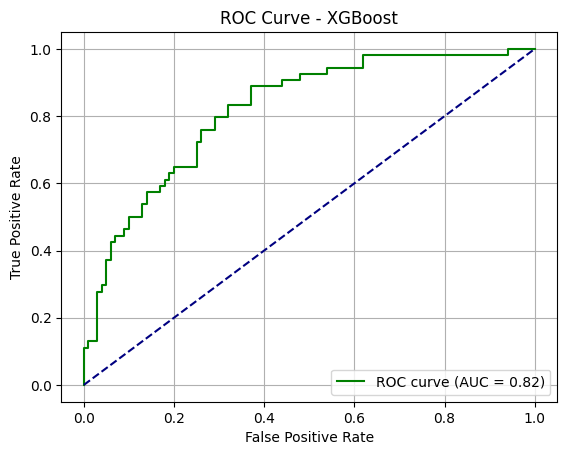

In [419]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Train the model
XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
XGB.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_xgb = XGB.predict(X_test_scaled)
y_proba_xgb = XGB.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

# ROC & AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='green', label='ROC curve (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()
